In [1]:
import os
from pathlib import Path

import librosa
import numpy as np
import pandas as pd
import soundfile as sf
from sklearn.model_selection import StratifiedKFold, train_test_split


from preprocessing import create_metadata, remove_underrepresented_categories, upscale_sample_rate, split_and_organize_files, apply_augmentation, augmentation
from visuals  import plot_category_distribution, plot_duration_histogram

### Create Metadata

In [2]:
# data_path = "../data/baby_cry/Baby\ Cry\ Dataset/"
data_path = os.path.join("..", "data", "Baby Cry Dataset")

metadata_df = create_metadata(data_path)
metadata_df.head()

,file_path,filename,sampling_rate,duration,category
0,../data/Baby Cry Dataset/belly pain/357c.wav,357c.wav,8000,7.0,belly pain
1,../data/Baby Cry Dataset/belly pain/358c.wav,358c.wav,8000,7.0,belly pain
2,../data/Baby Cry Dataset/belly pain/359c.wav,359c.wav,8000,7.0,belly pain
3,../data/Baby Cry Dataset/belly pain/360c.wav,360c.wav,8000,7.0,belly pain
4,../data/Baby Cry Dataset/belly pain/361c.wav,361c.wav,8000,7.0,belly pain


### Remove Underrepresentede Categories

In [3]:
data = remove_underrepresented_categories(metadata_df)
print(data['category'].unique())

['belly pain' 'burping' 'cold_hot' 'discomfort' 'hungry' 'tired']


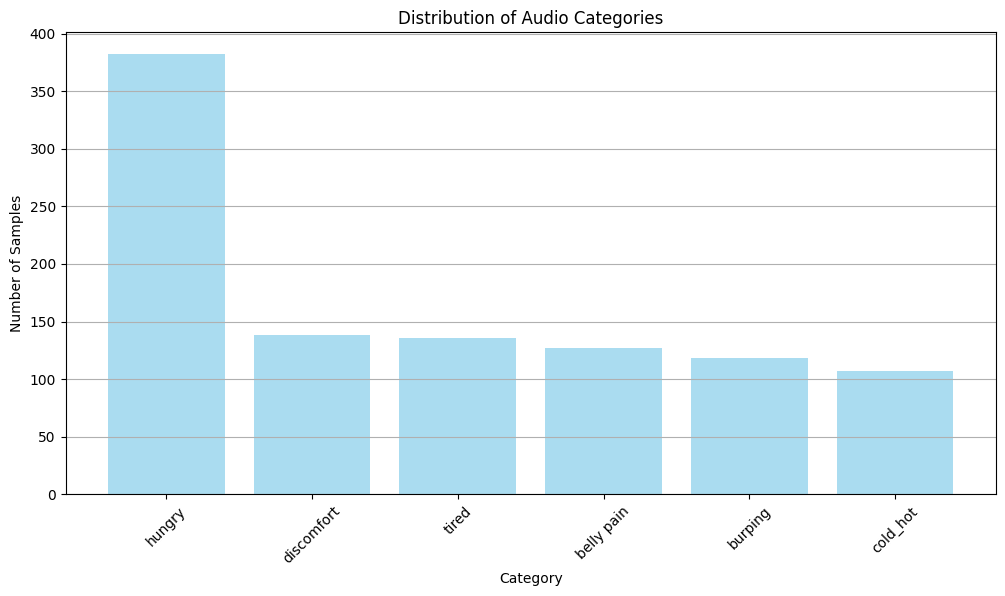

In [4]:
plot_category_distribution(data)

## Audio Preprocessing and Upsampling

To prepare the audio dataset for training:

- We **resample all audio files** to the **highest sample rate** found in the dataset.
- This ensures **uniform sampling rate** across all audio files, which is essential for feeding the data into neural networks.

Additionally, audio clips will be standardized to **5-second windows**.  
We will use this windowing approach for **data augmentation**, but we will apply it **after splitting the data** into training, validation, and test sets to prevent data leakage.

This way, we ensure both high quality and consistency in our audio inputs.


In [5]:
upscale_sample_rate(data)

[OK] Upsampled: ../data/Baby Cry Dataset/belly pain/357c.wav → 44100Hz
[OK] Upsampled: ../data/Baby Cry Dataset/belly pain/358c.wav → 44100Hz
[OK] Upsampled: ../data/Baby Cry Dataset/belly pain/359c.wav → 44100Hz
[OK] Upsampled: ../data/Baby Cry Dataset/belly pain/360c.wav → 44100Hz
[OK] Upsampled: ../data/Baby Cry Dataset/belly pain/361c.wav → 44100Hz
[OK] Upsampled: ../data/Baby Cry Dataset/belly pain/362c.wav → 44100Hz
[OK] Upsampled: ../data/Baby Cry Dataset/belly pain/363c.wav → 44100Hz
[OK] Upsampled: ../data/Baby Cry Dataset/belly pain/364c.wav → 44100Hz
[OK] Upsampled: ../data/Baby Cry Dataset/belly pain/365c.wav → 44100Hz
[OK] Upsampled: ../data/Baby Cry Dataset/belly pain/366c.wav → 44100Hz
[OK] Upsampled: ../data/Baby Cry Dataset/belly pain/367c.wav → 44100Hz
[OK] Upsampled: ../data/Baby Cry Dataset/belly pain/368c.wav → 44100Hz
[OK] Upsampled: ../data/Baby Cry Dataset/belly pain/369c.wav → 44100Hz
[OK] Upsampled: ../data/Baby Cry Dataset/belly pain/370c.wav → 44100Hz
[OK] U

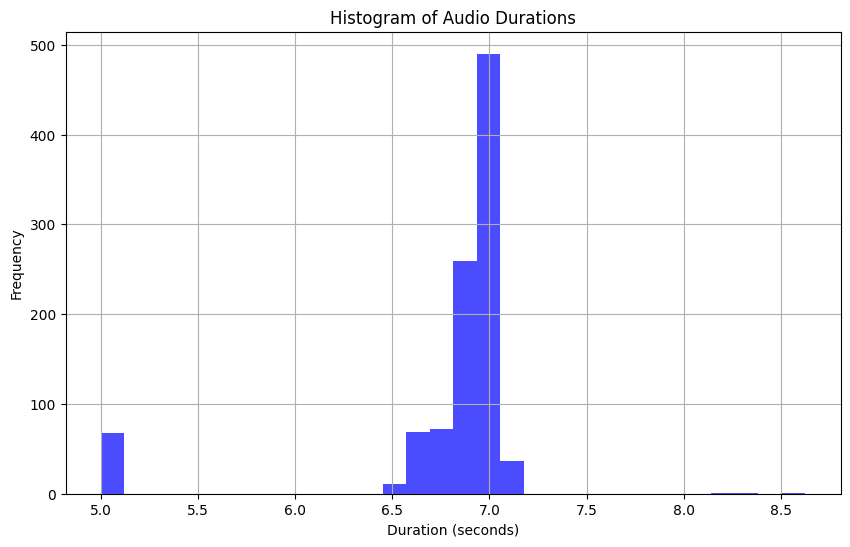

In [6]:
plot_duration_histogram(data)

In [7]:
splits_path = "../data/splits"

split_and_organize_files(splits_path, data)

In [8]:
train_path = "../data/splits/train/"
train_df = create_metadata(train_path)

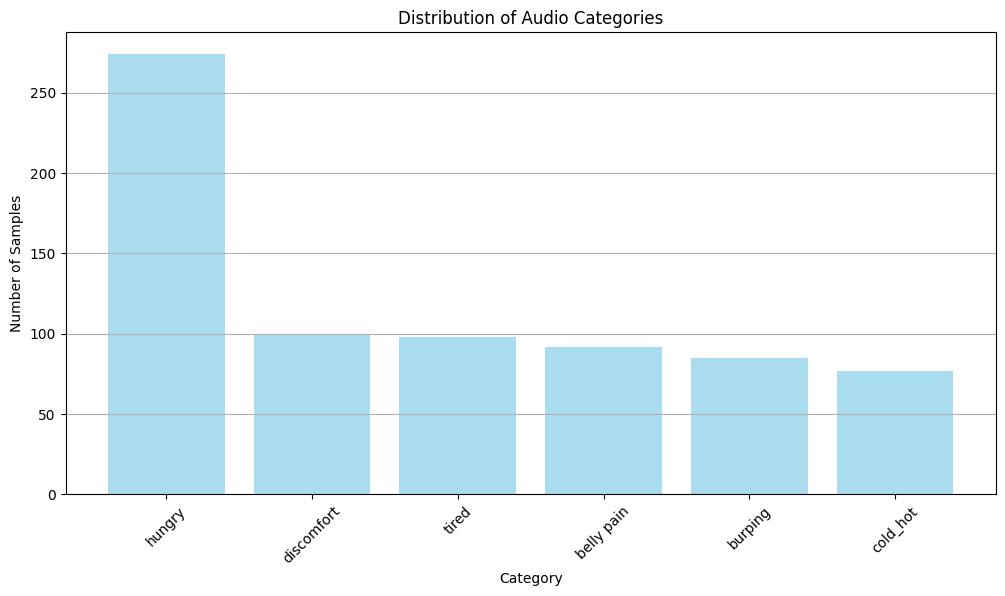

In [9]:
plot_category_distribution(train_df)

In [10]:
splits_path = "../data/splits"
apply_augmentation(splits_path)


🔹 Rodando augmentation para: train
Processando 'burping'...
Total: 274 samples
Processando 'tired'...
Total: 274 samples
Processando 'hungry'...
Total: 274 samples
Processando 'cold_hot'...
Total: 274 samples
Processando 'belly pain'...
Total: 274 samples
Processando 'discomfort'...
Total: 274 samples
Augmentation completed.
🔹 Rodando augmentation para: val
Processando 'tired'...
Total: 31 samples
Processando 'hungry'...
Total: 31 samples
Processando 'burping'...
Total: 31 samples
Processando 'discomfort'...
Total: 31 samples
Processando 'belly pain'...
Total: 31 samples
Processando 'cold_hot'...
Total: 31 samples
Augmentation completed.
🔹 Rodando augmentation para: test
Processando 'discomfort'...
Total: 77 samples
Processando 'belly pain'...
Total: 77 samples
Processando 'tired'...
Total: 77 samples
Processando 'hungry'...
Total: 77 samples
Processando 'burping'...
Total: 77 samples
Processando 'cold_hot'...
Total: 77 samples
Augmentation completed.
🔹 Rodando augmentation para: kfold

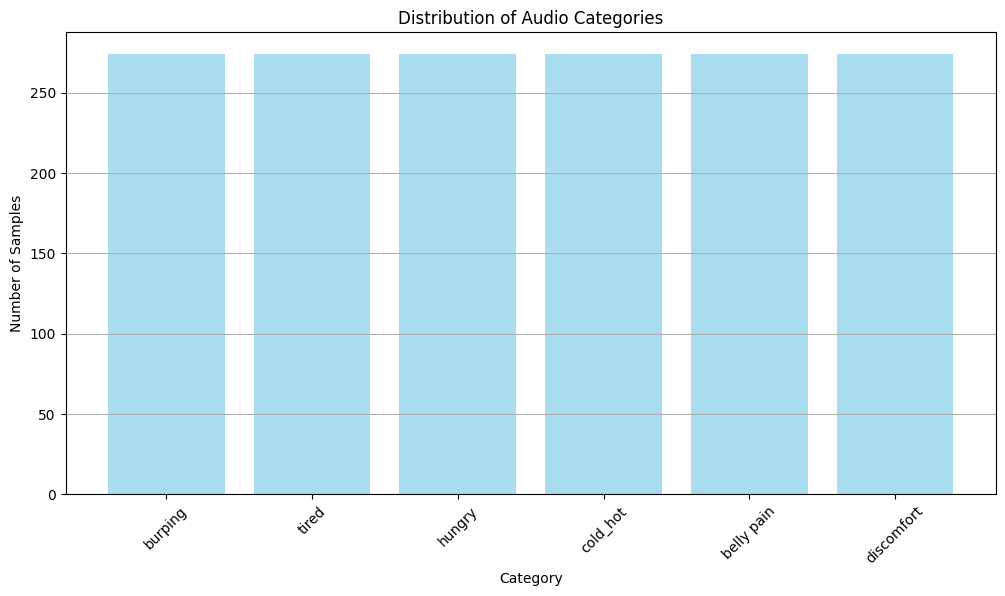

In [11]:
augumented_train_df = create_metadata(train_path)
plot_category_distribution(augumented_train_df)